1. National line plot
2. Fixed regression? R2? across all years
3. Scatterplot
4. Predict next year's GDP using NTL

Sub-national
1. NUTS3 national plot
2. NUTS3 fixed regression, R2 (all regions all years)
3. Scatter all regions byyear/distribution of all regions by  year
4. Predict next years's GDP using NTL

# Analysis of Germany GDP versus harmonized nighttime lights

In [1]:
from analysis.eu_gdp_vs_ntl import *
from harmonizer.main import crop_batch
from harmonizer.plots import plot_timeseries
from harmonizer.diagnostics import get_series
from harmonizer.config import OUTPUT, DMSP_CLIP, VIIRS_CLIP, DATA, VIIRS_IN, DMSP_IN, ROOT
import matplotlib.pyplot as plt
import seaborn as sns

## Get unprocessed VIIRS-DNB

1. This notebooks assumes the harmonizer has already been run on Germany and the harmonized time series is located in the `output/` folder.

2. We'll clip the raw input VNL files for comparison:

In [2]:
def crop_raw(din, vin, dout, vout, roipath):
    vout.mkdir(exist_ok=True)
    dout.mkdir(exist_ok=True)
    crop_batch(din, dout, roipath, 1)
    crop_batch(vin, vout, roipath, 1)
    
def normseries(series):
    series = np.asarray(series)
    return (series - np.mean(series)) / np.std(series)
    
DMSP_RAWDE = Path(DATA, "germany_rawDMSP")
VIIRS_RAWDE = Path(DATA, "germany_rawVIIRS")
OUTPUTDE = Path(OUTPUT, "gadm36_DEU_0")
roipathde = Path(ROOT, "roifiles/gadm36_DEU_shp/gadm36_DEU_0.shp")


DMSP_RAWIT = Path(DATA, "italy_rawDMSP")
VIIRS_RAWIT = Path(DATA, "italy_rawVIIRS")
OUTPUTIT = Path(OUTPUT, "gadm36_ITA_0")
roipathit = Path(ROOT, "roifiles/gadm36_ITA_shp/gadm36_ITA_0.shp")

DMSP_RAWFR = Path(DATA, "france_rawDMSP")
VIIRS_RAWFR = Path(DATA, "france_rawVIIRS")
OUTPUTFR = Path(OUTPUT, "gadm36_FRA_0")
roipathfr = Path(ROOT, "roifiles/gadm36_FRA_shp/gadm36_FRA_0.shp")

DMSP_RAWES = Path(DATA, "spain_rawDMSP")
VIIRS_RAWES = Path(DATA, "spain_rawVIIRS")
OUTPUTES = Path(OUTPUT, "gadm36_ESP_0")
roipathes = Path(ROOT, "roifiles/gadm36_ESP_shp/gadm36_ESP_0.shp")

# crop_raw(DMSP_IN, VIIRS_IN, DMSP_RAWDE, VIIRS_RAWDE, roipathde)
# crop_raw(DMSP_IN, VIIRS_IN, DMSP_RAWIT, VIIRS_RAWIT, roipathit)
# crop_raw(DMSP_IN, VIIRS_IN, DMSP_RAWFR, VIIRS_RAWFR, roipathfr)
# crop_raw(DMSP_IN, VIIRS_IN, DMSP_RAWES, VIIRS_RAWES, roipathes)

34it [01:10,  2.07s/it]
8it [00:27,  3.48s/it]
34it [01:01,  1.82s/it]
8it [00:24,  3.05s/it]
34it [01:04,  1.89s/it]
8it [00:27,  3.39s/it]


In [4]:
de_ntl = extract_time_series(DMSP_RAWDE, VIIRS_RAWDE, OUTPUTDE, 1, 1)
it_ntl = extract_time_series(DMSP_RAWIT, VIIRS_RAWIT, OUTPUTIT, 1, 1)
fr_ntl = extract_time_series(DMSP_RAWFR, VIIRS_RAWFR, OUTPUTFR, 1, 1)
es_ntl = extract_time_series(DMSP_RAWES, VIIRS_RAWES, OUTPUTES, 1, 1)

100%|██████████| 8/8 [00:00<00:00, 34.19it/s]


In [5]:
gdp = load_prep()
de_gdp = gdp['DE']
de_gdp.index = de_gdp.index.astype(int)

it_gdp = gdp['IT']
it_gdp.index = it_gdp.index.astype(int)

fr_gdp = gdp['FR']
fr_gdp.index = fr_gdp.index.astype(int)

es_gdp = gdp['ES']
es_gdp.index = es_gdp.index.astype(int)

In [14]:
def compare_normalized_ts(countrygdp, ntls, yrs, labels, ntl_ylabel, title):
    fig, ax = plt.subplots(1, figsize=(15,7))
    ax_r = ax.twinx()
    sns.lineplot(x=countrygdp.index, y=normseries(countrygdp.values), ax=ax, label="GDP")
    for ntl, yr, label in zip(ntls, yrs, labels):
        sns.lineplot(x=yr, y=normseries(ntl), ax=ax, label=label)
    plt.legend(loc="best", fontsize=20)
    ax.set_ylabel("GDP", fontsize=20)
    ax_r.set_ylabel(ntl_ylabel, fontsize=20)
    plt.xlabel("year", fontsize=20)
    plt.title(title, fontsize=20);

# compare_normalized_ts(de_gdp, 
#                       [de_ntl['DMSP_unadj_mean'], de_ntl['VIIRS_unadj_mean']], 
#                       [de_ntl['DMSP_yrs'], de_ntl['VIIRS_yrs']],
#                       ['DMSP unadj.', 'VIIRS unadj.'],
#                      "NTL (per pixel mean)",
#                      "Germany DMSP and VIIRS before harmonization (mean) vs GDP")

In [13]:
# compare_normalized_ts(de_gdp, 
#                       [de_ntl['DMSP_adj_sol'], de_ntl['VIIRS_adj_sol']], 
#                       [de_ntl['DMSP_yrs'], de_ntl['VIIRS_yrs']],
#                       ['DMSP adj.', 'VIIRS adj.'],
#                      "NTL (per pixel mean)",
#                      "Germany DMSP and VIIRS after harmonization radiance (mean) vs GDP")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


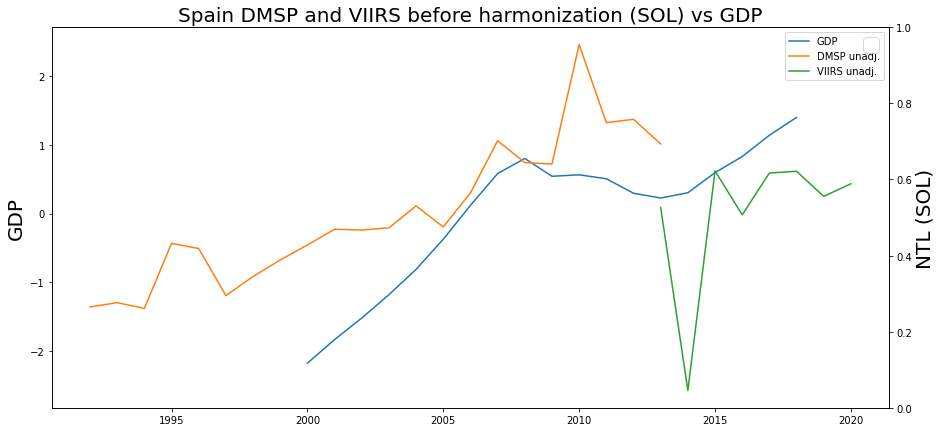

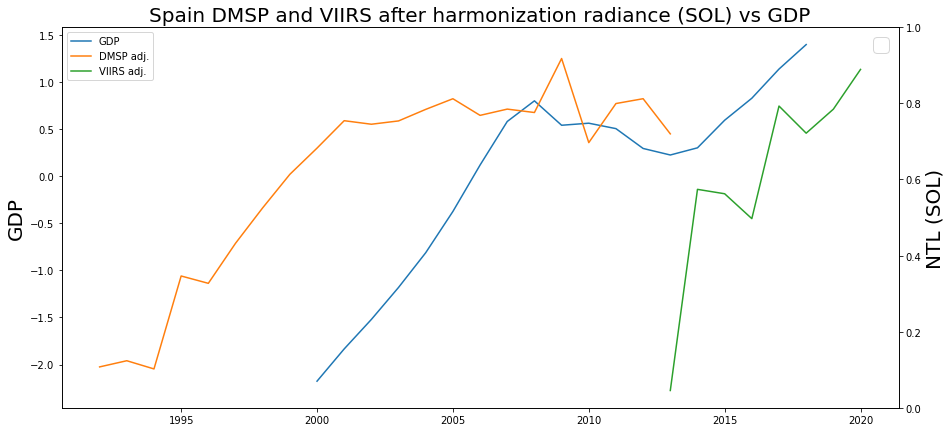

In [15]:
countrygdp = es_gdp
out = es_ntl

compare_normalized_ts(countrygdp, 
                      [out['DMSP_unadj_sol'], out['VIIRS_unadj_sol']], 
                      [out['DMSP_yrs'], out['VIIRS_yrs']],
                      ['DMSP unadj.', 'VIIRS unadj.'],
                     "NTL (SOL)",
                     "Spain DMSP and VIIRS before harmonization (SOL) vs GDP")


compare_normalized_ts(countrygdp, 
                      [out['DMSP_adj_sol'], out['VIIRS_adj_sol']], 
                      [out['DMSP_yrs'], out['VIIRS_yrs']],
                      ['DMSP adj.', 'VIIRS adj.'],
                     "NTL (SOL)",
                     "Spain DMSP and VIIRS after harmonization radiance (SOL) vs GDP")